In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_customers=pd.read_csv('/content/Customers.csv')
df_products=pd.read_csv('/content/Products.csv')
df_transactions=pd.read_csv('/content/Transactions.csv')

In [4]:
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'], errors='coerce')
df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'], errors='coerce')

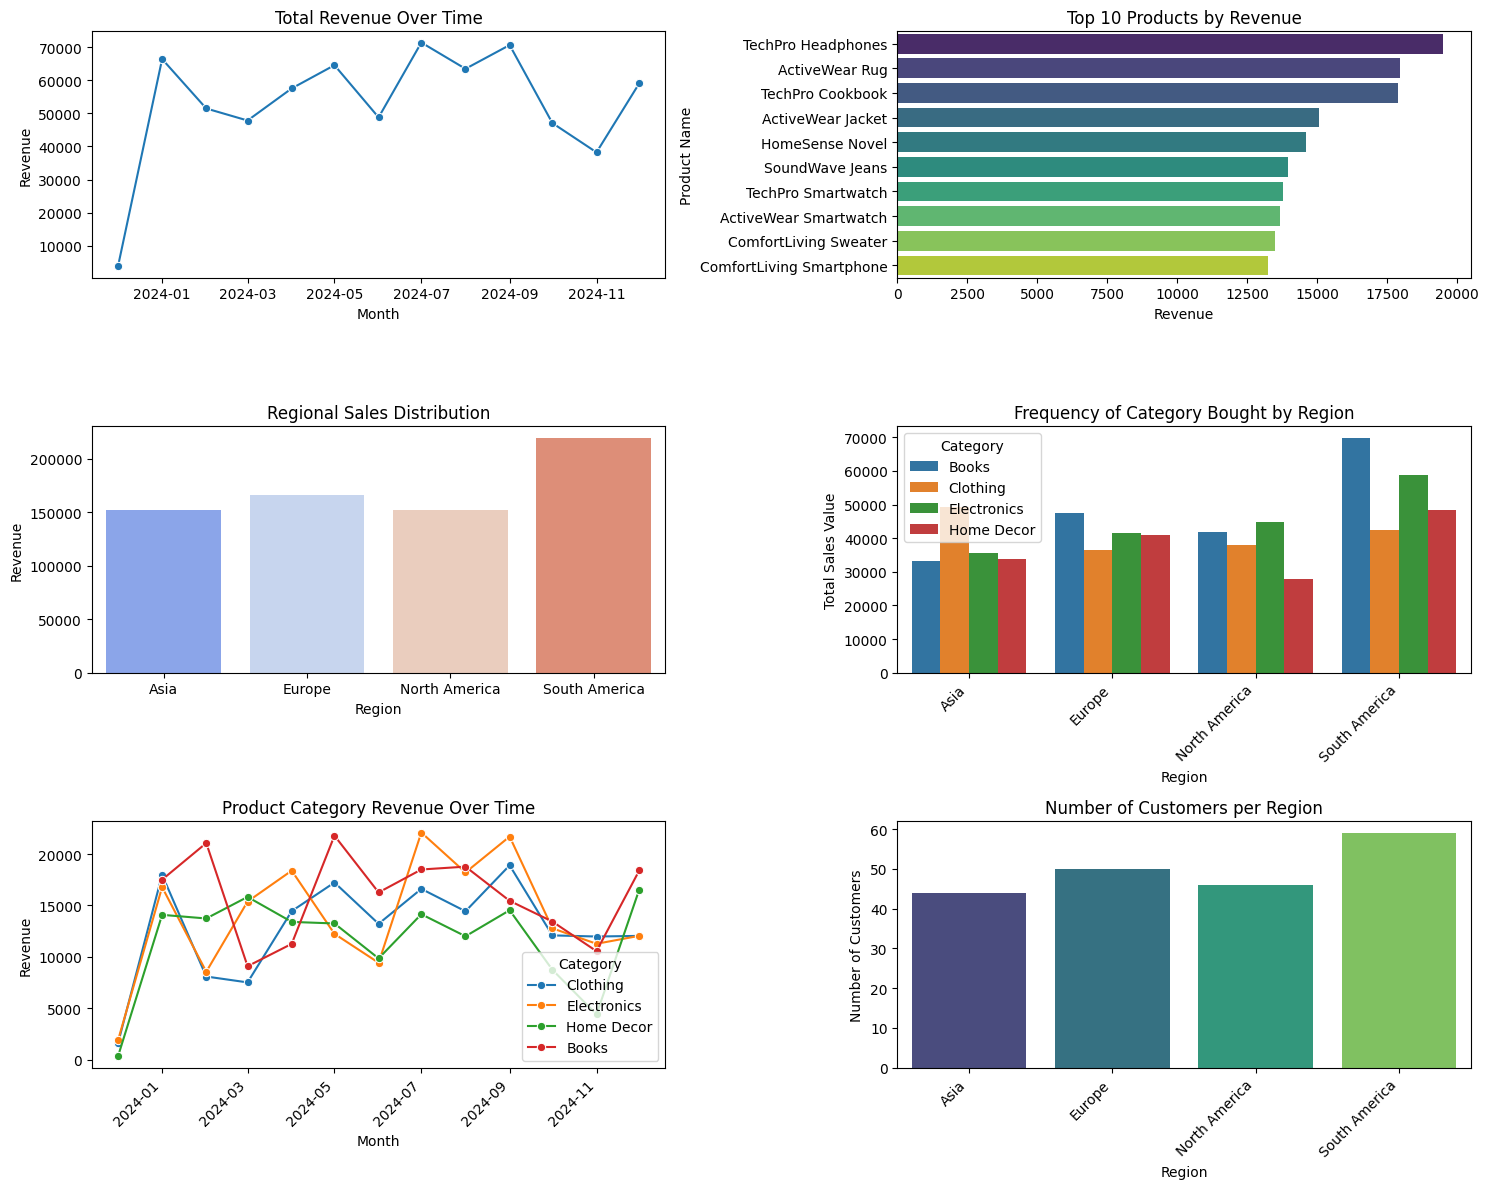

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df_transactions['Month'] = df_transactions['TransactionDate'].dt.to_period('M')
revenue_by_month = df_transactions.groupby('Month')['TotalValue'].sum().reset_index()
revenue_by_month['Month'] = revenue_by_month['Month'].dt.to_timestamp()

top_products = df_transactions.groupby('ProductID')['TotalValue'].sum().nlargest(10).reset_index()
top_products = top_products.merge(df_products, on='ProductID')

transactions_with_customers = df_transactions.merge(df_customers, on='CustomerID')
regional_sales = transactions_with_customers.groupby('Region')['TotalValue'].sum().reset_index()

transactions_with_customers = df_transactions.merge(df_customers, on='CustomerID')
transactions_with_details = transactions_with_customers.merge(df_products, on='ProductID')
category_sales_by_region = transactions_with_details.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

product_category_by_month = transactions_with_details.groupby(['Month', 'Category'])['TotalValue'].sum().reset_index()
product_category_by_month['Month'] = product_category_by_month['Month'].dt.to_timestamp()

customer_per_region = transactions_with_customers.groupby('Region')['CustomerID'].nunique().reset_index()

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.lineplot(data=revenue_by_month, x='Month', y='TotalValue', marker='o')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')

plt.subplot(3, 2, 2)
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')

plt.subplot(3, 2, 3)
sns.barplot(data=regional_sales, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Regional Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Revenue')

plt.subplot(3, 2, 4)
sns.barplot(x='Region', y='TotalValue', hue='Category', data=category_sales_by_region)
plt.title('Frequency of Category Bought by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 2, 5)
sns.lineplot(data=product_category_by_month, x='Month', y='TotalValue', hue='Category', marker='o')
plt.title('Product Category Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 2, 6)
sns.barplot(data=customer_per_region, x='Region', y='CustomerID', palette='viridis')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
